Лабораторная работа 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# импортирование данных 
digits = datasets.load_digits()
X = digits.data
y = digits.target
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


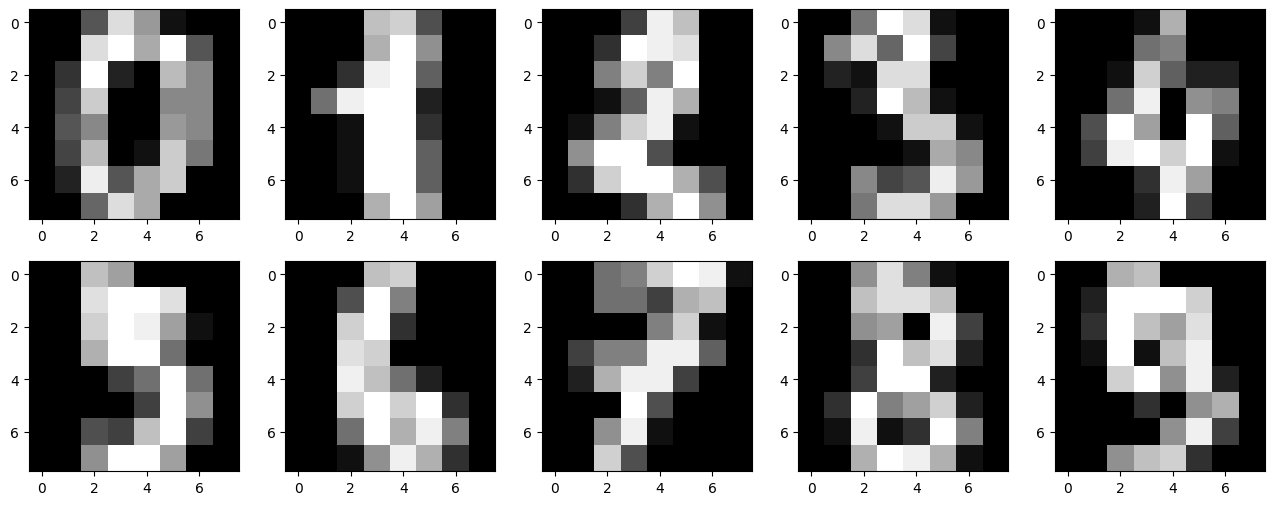

In [3]:
#визуализация данных 
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')

In [68]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

In [5]:
# Создание тестовой и тренеровочных выборок
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=11)

print(f'Size X_tain 80%: {X_train.shape}')
print(f'Size X_test 20%: {X_test.shape}')

Size X_tain 80%: (1437, 64)
Size X_test 20%: (360, 64)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn = KNeighborsClassifier()


In [8]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = knn.predict(X_test)

In [10]:
df_pred = pd.DataFrame(X_test)
df_pred['y_pred'] = y_pred
df_pred['y_test'] = y_test
df_pred

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,y_pred,y_test
0,0.0,0.0,7.0,13.0,8.0,4.0,0.0,0.0,0.0,1.0,...,0.0,0.0,8.0,14.0,12.0,3.0,0.0,0.0,0,0
1,0.0,0.0,0.0,4.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,14.0,0.0,0.0,0.0,4,4
2,0.0,0.0,6.0,12.0,13.0,5.0,0.0,0.0,0.0,2.0,...,0.0,0.0,3.0,16.0,14.0,0.0,0.0,0.0,9,9
3,0.0,0.0,3.0,11.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,9.0,16.0,16.0,6.0,0.0,9,9
4,0.0,0.0,1.0,10.0,15.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,11.0,15.0,16.0,12.0,0.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.0,0.0,0.0,5.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0,4,4
356,0.0,0.0,0.0,8.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,12.0,10.0,0.0,0.0,0.0,4,4
357,0.0,0.0,6.0,15.0,16.0,16.0,3.0,0.0,0.0,0.0,...,0.0,0.0,4.0,16.0,14.0,3.0,0.0,0.0,5,5
358,0.0,1.0,11.0,16.0,11.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,16.0,3.0,0.0,0.0,0.0,0.0,7,7


In [11]:
# выведем несовпадающие значения предказанных и тестовых данных
df_pred.loc[df_pred['y_pred'] != df_pred['y_test']].iloc[:,64:]

,y_pred,y_test
18,5,3
51,8,9
144,4,9
152,7,3
201,7,4


№ 14.3

In [12]:
print(f'Score: {knn.score(X_test, y_test):.2%}')

Score: 98.61%


In [25]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Ниже приведена матрица несоответствий, полученная по итогам предшествующего вывода. Правильные прогнозы находятся на главной диагонали, проходящей от левого верхнего до правого нижнего угла. Ненулевые значения, не находящиеся на главной диагонали, обозначают ошибочные прогнозы:

In [14]:
con_matrix = confusion_matrix(df_pred.y_test, df_pred.y_pred)
con_matrix

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 37,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 40,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 35]])

Каждая строка представляет один класс, то есть одну из цифр от 0 до 9.
Столбцы обозначают количество тестовых образцов, классифицированных
в соответствующий класс. Например, строка 0:
[45, 0, 0, 0, 0, 0, 0, 0, 0, 0]
представляет класс цифры 0. Столбцы представляют 10 возможных целевых
классов 0–9. Так как мы работаем с цифрами, классы (0–9) и индексы строк
и столбцов (0–9) совпадают. По данным строки, 0, 45 тестового образца были
классифицированы как цифра 0, но ни один из тестовых образцов не был
ошибочно классифицирован как одна из цифр 1–9. Таким образом, все 100%
цифр 0 были спрогнозированы правильно.

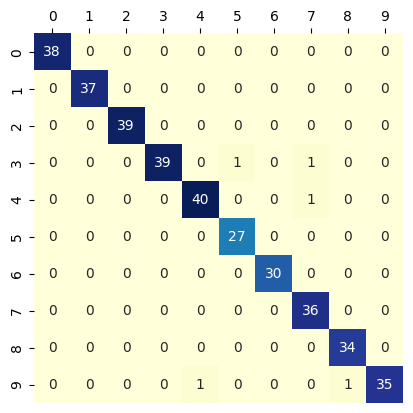

In [41]:
ax = sns.heatmap(con_matrix, annot=True, cmap="YlGnBu", cbar=False, square=True)
ax.xaxis.tick_top()

Отчет по классификации
Модуль sklearn.metrics также предоставляет функцию classification_report, которая выводит таблицу метрик классификации, основанных на ожидаемых и прогнозируемых значениях:

In [39]:
names = [str(digit) for digit in digits.target_names]

In [40]:
print(classification_report(df_pred.y_test, df_pred.y_pred, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        39
           3       1.00      0.95      0.97        41
           4       0.98      0.98      0.98        41
           5       0.96      1.00      0.98        27
           6       1.00      1.00      1.00        30
           7       0.95      1.00      0.97        36
           8       0.97      1.00      0.99        34
           9       1.00      0.95      0.97        37

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



В этом отчете:

Ø precision — точность, то есть общее количество точных прогнозов для
заданной цифры, разделенное на общее количество прогнозов для этой
цифры. Точность можно проверить по столбцам матрицы несоответствий.
Например, взглянув на столбец с индексом 7, вы увидите значение 1

в строках 3 и 4: это означает, что одна цифра 3 и одна цифра 4 были оши-
бочно классифицированы как 7. Значение 45 в строке 7 показывает, что

45 изображений были правильно классифицированы как 7. Таким обра-
зом, точность для цифры 7 составляет 45/47, или 0,96;

Ø recall — отклик, то есть общее количество правильных прогнозов для
заданной цифры, разделенное на общее количество образцов, которые
должны были прогнозироваться как эта цифра. Отклик можно проверить
по строкам матрицы несоответствий. Например, в строке с индексом 8
встречаются три значения 1 и значение 2; это означает, что некоторые
цифры 8 были ошибочно классифицированы как другие цифры, а также

значение 39, которое показывает, что 39 изображений были классифици-
рованы правильно. Таким образом, отклик для цифры 8 составляет 39/44,

или 0,89;

Ø f1-score — среднее значение точности и отклика;

Ø support — количество образцов с заданным ожидаемым значением. На-
пример, 50 образцов были снабжены меткой 4, а 38 образцов — меткой 5.

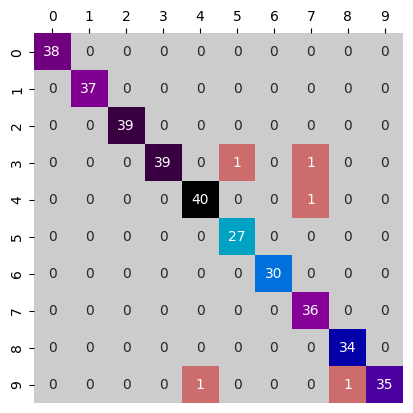

In [43]:
ax = sns.heatmap(con_matrix, annot=True, cmap='nipy_spectral_r', cbar=False, square=True)
ax.xaxis.tick_top()

K-проходная перекрестная проверка позволяет использовать все данные как
для обучения, так и для тестирования. Повторное обучение и тестирование

модели с разными частями набора данных помогают лучше понять, как мо-
дель справляется с прогнозированием для новых данных. Набор данных раз-
бивается на k частей равного размера (параметр k в данном случае никак не

связан с k из алгоритма k ближайших соседей). После этого модель повторно
обучается на k – 1 частях и тестируется на оставшейся части. Для примера

возьмем k = 10 с нумерацией частей от 1 до 10. Со всеми частями будут вы-
полнены 10 последовательных циклов обучения и тестирования:

Ø Сначала выполняется обучение на частях 1–9, а затем тестирование с ча-
стью 10.

Ø Затем выполняется обучение на частях 1–8 и 10, а затем тестирование
с частью 9.

Ø Затем выполняется обучение на частях 1–7 и 9–10, а затем тестирование
с частью 8.

Цикл обучения и тестирования продолжается до тех пор, пока каждая часть
не будет использована для тестирования модели.

In [47]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

Ключевые аргументы:

Ø n_splits=10 — количество частей;

Ø random_state=11 — значение инициализации генератора случайных чисел
для обеспечения воспроизводимости результатов;

Ø shuffle=True — объект KFold выполняет случайную перестановку данных
перед разбиением их на части. Этот шаг особенно важен, если образцы
могут быть сгруппированы или упорядочены. Например, набор данных Iris, который будет использован позднее в этой главе, содержит 150 образцов трех разновидностей ирисов: первые пятьдесят относятся к Iris setosa, следующие пятьдесят — к Iris versicolor, а последние 5 пятьдесят 0 — к Iris virginica. Если не переставить образцы, то может оказаться, что в обучающих данных нет ни одного образца конкретного вида ирисов, а тестовые данные состоят из данных одного вида.

In [57]:
cross_val_sc = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
cross_val_sc

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

Ключевые аргументы:

Ø estimator=knn — оценщик, который вы хотите проверить;

Ø X=digits.data — образцы, используемые для обучения и тестирования;

Ø y=digits.target — прогнозы целевых значений для образцов;

Ø cv=kfold — генератор перекрестной проверки, определяющий способ раз-
биения образцов и целевых значений для обучения и тестирования.

Функция cross_val_score возвращает массив показателей точности — по
одной для каждой части. Как видно из следующего вывода, модель была
достаточно точной. Наименьший показатель точности составил 0,97777778
(97,78%), а в одном случае при прогнозировании всей части была достигнута
100-процентная точность:

In [61]:
print(f'Cross_val_score: {cross_val_sc.mean():.2%}')
print(f'Accuracy standard deviation: {cross_val_sc.std():.2%}')

Cross_val_score: 98.72%
Accuracy standard deviation: 0.75%


В среднем модель обеспечивала точность 98,72%, то есть даже больше, чем
в предыдущем варианте, когда 75% данных использовалось для обучения,
а 25% — для тестирования.

14.3.3. Выполнение нескольких моделей для поиска
наилучшей

In [65]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm

In [64]:
estimators = {
    'KNeighborsClassifier': knn,
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

In [67]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' +
    f'mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


In [72]:
for k in tqdm(range(1, 20, 2)):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn,
    X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')

 10%|████▍                                       | 1/10 [00:00<00:02,  4.09it/s]

k=1 ; mean accuracy=98.83%; standard deviation=0.58%


 20%|████████▊                                   | 2/10 [00:00<00:01,  4.19it/s]

k=3 ; mean accuracy=98.83%; standard deviation=0.72%


 30%|█████████████▏                              | 3/10 [00:00<00:01,  4.17it/s]

k=5 ; mean accuracy=98.72%; standard deviation=0.75%


 40%|█████████████████▌                          | 4/10 [00:01<00:01,  3.40it/s]

k=7 ; mean accuracy=98.44%; standard deviation=0.96%


 50%|██████████████████████                      | 5/10 [00:01<00:01,  3.30it/s]

k=9 ; mean accuracy=98.39%; standard deviation=0.80%


 60%|██████████████████████████▍                 | 6/10 [00:01<00:01,  3.56it/s]

k=11; mean accuracy=98.39%; standard deviation=0.80%


 70%|██████████████████████████████▊             | 7/10 [00:01<00:00,  3.76it/s]

k=13; mean accuracy=97.89%; standard deviation=0.89%


 80%|███████████████████████████████████▏        | 8/10 [00:02<00:00,  3.73it/s]

k=15; mean accuracy=97.89%; standard deviation=1.02%


 90%|███████████████████████████████████████▌    | 9/10 [00:02<00:00,  3.78it/s]

k=17; mean accuracy=97.55%; standard deviation=1.06%


100%|███████████████████████████████████████████| 10/10 [00:02<00:00,  3.76it/s]

k=19; mean accuracy=97.66%; standard deviation=0.96%


In [99]:
# альтернативный вариант подбора гиперпараметров 
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=k)

scores = cross_val_score(estimator=grid, X=digits.data, y=digits.target, cv=kfold)

params = {'n_neighbors': range(1, 20, 2)}

grid = GridSearchCV(knn, params)
i = 1
for score in scores:
    print(f'k={i}; mean accuracy={scores.mean():.2%}; ' +
    f'standard deviation={scores.std():.2%}')
    i = i+2

k=1; mean accuracy=98.78%; standard deviation=0.65%
k=3; mean accuracy=98.78%; standard deviation=0.65%
k=5; mean accuracy=98.78%; standard deviation=0.65%
k=7; mean accuracy=98.78%; standard deviation=0.65%
k=9; mean accuracy=98.78%; standard deviation=0.65%
k=11; mean accuracy=98.78%; standard deviation=0.65%
k=13; mean accuracy=98.78%; standard deviation=0.65%
k=15; mean accuracy=98.78%; standard deviation=0.65%
k=17; mean accuracy=98.78%; standard deviation=0.65%
k=19; mean accuracy=98.78%; standard deviation=0.65%
